# **USED CAR COST PRICE PREDICTION**

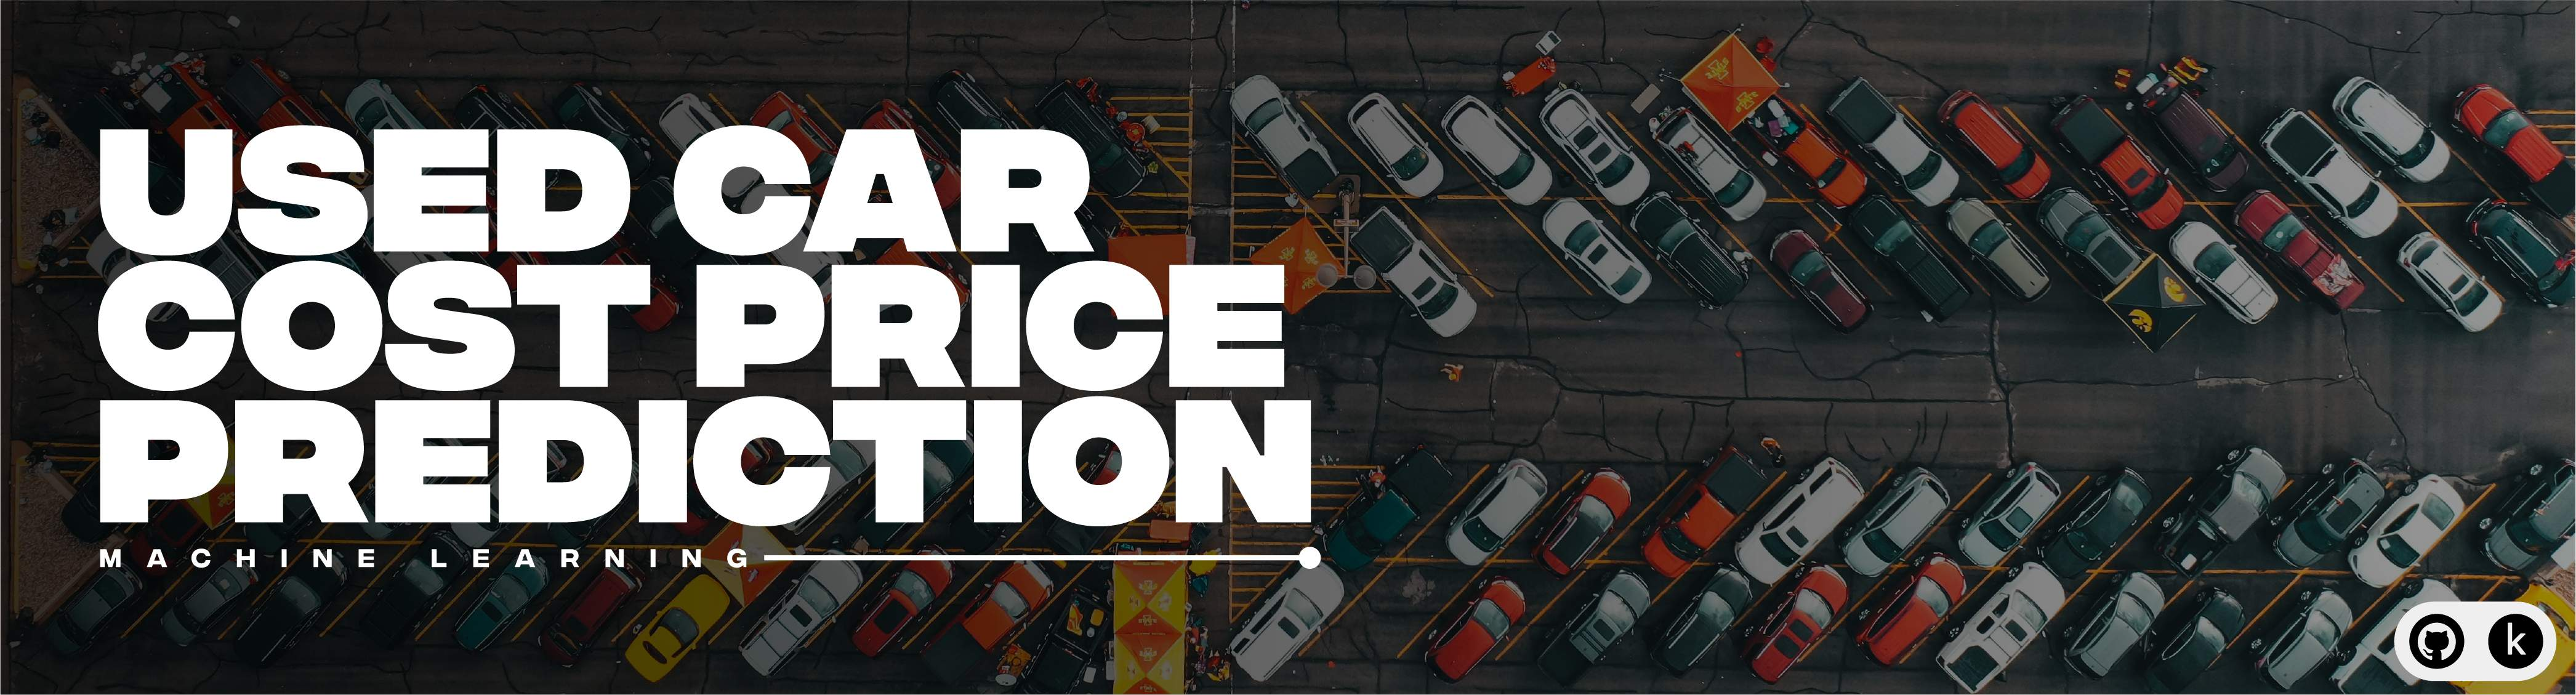

---

## **Question:** Can we accurately predict the initial purchase price of used cars based on various features?

**Author:** Manjit Baishya   
**Start Date:** 26/11/2023  
**Project Status:** Complete and Monitoring  
**End Date:** 28/11/2023

## **Source**
The dataset has been take from [**Kaggle**](https://www.kaggle.com/datasets/sujay1844/used-car-prices/data). My work is available in both [**Kaggle**](https://www.kaggle.com/code/manjitbaishya001/used-car-prices) and [**GitHub**](https://github.com/manjit-baishya-2023/Used_Car_Cost_Price_Prediction)

## **Scenario**

A lot of cars in the dataset are missing their cost price at which they were brought. This project shifts its focus to predicting the initial purchase price of used cars sourced from **"Cars24"**. The primary objective is to develop a model that accurately estimates the price at which the cars were originally bought. Training, testing and validation will be done on the values that are available and the model will be fine tuned accordingly. Then, the model will then be used to predict the dates of the missing rows.

## **Atatement of Work**

### **Overview**
The project aims to employ machine learning techniques on a tabular dataset containing details of used cars to create a predictive model for the initial purchase price.

### **Objectives**
The main objectives include: 
1. Identifying the key features that significantly contribute to the pricing model.
2. Testing data over several ML Algorithms.
3. Choosing a predictive model for the prediction of cost price of used cars.
4. Evaluating the model's accuracy and effectiveness.
5. Predicting missing cost price of cars.

### **Scope of Work**
The analysis will involve utilizing features such as make and model, location, year of manufacture, mileage, fuel type, transmission type, number of owners, engine specifications, and the current resale price.

### **Deliverables**
The project will result in a comprehensive report detailing the machine learning model testing process, key features influencing the initial purchase price, and recommendations for enhancing the predictive accuracy.

### **Timeline and Milestones**
Data Preparation and Process: 26th Nov to 26th Nov  
Model Testing and Training: 27th Nov to 27th Nov  
Evaluation and Fine-Tuning: 27th Nov to 27th Nov
Reports and Deliverables: 27th Nov to 28th Nov  


## **Analyzing the Data to Tackle the Business Task**

### **Step 1:** Ask Smart Questions!

#### **Clarifying the Business Task**

The business task involves developing a machine learning model to predict the initial purchase price of used cars. This requires exploring the dataset to identify relevant features and their impact on the original purchase price.

#### **Identify the Key Stakeholders**

1. **Car Dealerships and Sales Teams:** Stakeholders are keen on a predictive model that aids in setting competitive sale prices for used cars.
2. **Potential Car Buyers:** Individuals looking to understand how different features affect the final sale price to make informed decisions.
3. **Automotive Manufacturers:** Manufacturers seek insights into how specific features impact the initial resale value of their vehicles.
4. **Insurance Companies:** Understanding the initial purchase price is crucial for determining insurance coverage and premiums.
5. **Regulatory Authorities:** Authorities regulating the automotive industry may find the predictive model valuable for policy considerations related to the resale market.

### **Step 2:** Preparing the Data

#### **About the Used Dataset**

The dataset comprises tabular data sourced from **Cars24**, covering various attributes of used cars. The target variable is the initial purchase price of the used cars.

Regarding data quality, reliability, and privacy, the dataset is assumed to be reliable as it originates from a reputable source. The dataset's comprehensiveness, currency, and context are considered satisfactory.

### **Step 3:** Pre-Processing Data

Due to the tabular nature of the dataset, a cleaning and manipulation process has been performed. The features include make and model, location, year of manufacture, mileage, odometer reading, fuel type, transmission type, number of owners, engine specifications, number of seats, and the current resale price.

#### **Documenting Data Cleaning and Manipulation**

* Loading necessary packages and importing the dataset
* Removing irrelevant data if any
* Reformatting data types wherever required
* Handling missing values
* Segregating data if required

This introduction sets the stage for the testing of a machine learning model aimed at predicting the initial cost price of used cars.

# **Pre-Processing Data**
---

## 1. **Importing Data**

* We here import all required libraries and data sources

In [1]:
# importing required libraries
import numpy as np      # numerical operations
import pandas as pd     # dataframe handling
import seaborn as sns   # visualization
import matplotlib.pyplot as plt # visualization

import warnings         # ignore warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    # normalizer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error   # error analysis

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet     # regression model
from sklearn.ensemble import RandomForestRegressor                              # regression model
from xgboost import XGBRegressor                                                # regression model
from sklearn.svm import SVR                                                     # regression model
from sklearn.preprocessing import PolynomialFeatures                            # regression model

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score                                      # check accuracy
from sklearn.model_selection import RandomizedSearchCV                          # hyperparameter tuning

In [2]:
# importing data
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


## 2. **Cleaning Data**

* Removing column **"Unnamed: 0"** as we already have a default indexing available.

In [3]:
# dropping column
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


* Now we **rename** the column to something simpler.

In [4]:
df.columns = ['Car', 'Location', 'Year', 'ODO', 'Fuel', 'Transmission', 'Owner', 'Mileage', 'Engine', 'Power', 'Seats', 'CP', 'SP']
df.head()

,Car,Location,Year,ODO,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,CP,SP
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


* Checking for null values

In [5]:
df.isna().sum()

Car                0
Location           0
Year               0
ODO                0
Fuel               0
Transmission       0
Owner              0
Mileage            2
Engine            36
Power             36
Seats             38
CP              5032
SP                 0
dtype: int64

In [6]:
# replacing NaN values with 0
df['CP'].fillna(0, inplace=True)

for index, row in df.iterrows():
    if type(row['CP']) == str and 'Lakh' in row['CP']:
        converted_value = float(row['CP'].replace(' Lakh', '')) 
        df.at[index, 'CP'] = converted_value

    if type(row['CP']) == str and 'Cr' in row['CP']:
        converted_value = float(row['CP'].replace(' Cr', ''))*100
        df.at[index, 'CP'] = converted_value

df['CP'] = df['CP'].astype(float)

df.head()

,Car,Location,Year,ODO,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,CP,SP
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,0.00,12.50
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61,4.50
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,0.00,6.00
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,0.00,17.74
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,0.00,3.50


* We drop all remaining missing columns.

In [7]:
# dropping
df = df.dropna()

# validating
df.isna().sum()

Car             0
Location        0
Year            0
ODO             0
Fuel            0
Transmission    0
Owner           0
Mileage         0
Engine          0
Power           0
Seats           0
CP              0
SP              0
dtype: int64

Now, there can be multiple units of **mileage**, **engine** and **power** in the list but we will be requiring them to be in the same units when we do data analysis. So, we find if there are any such instances.

In [8]:
def extract_units(strings):
    units = set()
    for value in strings:
        words = value.split()
        for i in range(len(words) - 1):
            unit = words[i + 1]
            if unit in units:
                continue
            else:
                units.add(unit)
    return units


In [9]:
# finding unique units
mileage_units = extract_units(df['Mileage'])
print(f'Unique Mileage units: {mileage_units}')

mileage_units = extract_units(df['Engine'])
print(f'Unique Engine volume units: {mileage_units}')

mileage_units = extract_units(df['Power'])
print(f'Unique Power units: {mileage_units}')

Unique Mileage units: {'km/kg', 'kmpl'}
Unique Engine volume units: {'CC'}
Unique Power units: {'bhp'}


So, we can see that only mileage is in two units, so we clean the other two columns.

In [10]:
# stripping off units
df['Engine'] = df['Engine'].str.replace(' CC', '').astype(float)
df['Power'] = df['Power'].str.replace(' bhp', '').astype(float)

df.head()

,Car,Location,Year,ODO,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,CP,SP
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,0.00,12.50
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199.0,88.70,5.0,8.61,4.50
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,0.00,6.00
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,0.00,17.74
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461.0,63.10,5.0,0.00,3.50


* Converting **'kg/km'** to **'kmpl'**.

In [11]:
# kmpl = (km/kg)/denstiy
# density of petrol = 0.740 (avg)
# density of diesel = 0.832 (avg)

# defining conditions
condition = (df['Mileage'].str.contains('km/kg'))

# applying condition 1
for index, row in df[condition].iterrows():
    if row['Fuel'] == 'Diesel':
        # Strip away 'km/kg' and convert to float for petrol
        converted_value = float(row['Mileage'].replace(' km/kg', '')) / 0.740  # Replace 0.8 with your specific conversion factor
        df.at[index, 'Mileage'] = converted_value

    if row['Fuel'] == 'Petrol':
        # Strip away 'km/kg' and convert to float for petrol
        converted_value = float(row['Mileage'].replace(' km/kg', '')) / 0.832  # Replace 0.8 with your specific conversion factor
        df.at[index, 'Mileage'] = converted_value


df.head()


,Car,Location,Year,ODO,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,CP,SP
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,0.00,12.50
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,15.625,1199.0,88.70,5.0,8.61,4.50
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,0.00,6.00
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,0.00,17.74
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461.0,63.10,5.0,0.00,3.50


* Converting remaining rows

In [12]:
for index, row in df.iterrows():
    if type(row['Mileage']) == str and ' kmpl' in row['Mileage']:
        # Replace ' km/l' and convert to float
        df.at[index, 'Mileage'] = row['Mileage'].replace(' kmpl', '')

df['Mileage'] = df['Mileage'].astype(float)
df.head()

,Car,Location,Year,ODO,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,CP,SP
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.0,126.20,5.0,0.00,12.50
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,15.625,1199.0,88.70,5.0,8.61,4.50
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.0,88.76,7.0,0.00,6.00
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.0,140.80,5.0,0.00,17.74
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.080,1461.0,63.10,5.0,0.00,3.50


* We replace "year" with "age"

In [13]:
df['Age'] = 2023 - df['Year']
df.drop('Year', axis = 1, inplace = True)

df.head()

,Car,Location,ODO,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,CP,SP,Age
0,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.670,1582.0,126.20,5.0,0.00,12.50,8
1,Honda Jazz V,Chennai,46000,Petrol,Manual,First,15.625,1199.0,88.70,5.0,8.61,4.50,12
2,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.770,1248.0,88.76,7.0,0.00,6.00,11
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.200,1968.0,140.80,5.0,0.00,17.74,10
4,Nissan Micra Diesel XV,Jaipur,86999,Diesel,Manual,First,23.080,1461.0,63.10,5.0,0.00,3.50,10


* Rearranging final data

In [14]:
df = df[['Car', 'Location', 'Fuel', 'Transmission', 'Owner', 'ODO', 'Age', 'Mileage', 'Engine', 'Power', 'Seats', 'SP', 'CP']]
df.head()

,Car,Location,Fuel,Transmission,Owner,ODO,Age,Mileage,Engine,Power,Seats,SP,CP
0,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,41000,8,19.670,1582.0,126.20,5.0,12.50,0.00
1,Honda Jazz V,Chennai,Petrol,Manual,First,46000,12,15.625,1199.0,88.70,5.0,4.50,8.61
2,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,87000,11,20.770,1248.0,88.76,7.0,6.00,0.00
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,40670,10,15.200,1968.0,140.80,5.0,17.74,0.00
4,Nissan Micra Diesel XV,Jaipur,Diesel,Manual,First,86999,10,23.080,1461.0,63.10,5.0,3.50,0.00


In [15]:
# final overview
df.dtypes

Car              object
Location         object
Fuel             object
Transmission     object
Owner            object
ODO               int64
Age               int64
Mileage         float64
Engine          float64
Power           float64
Seats           float64
SP              float64
CP              float64
dtype: object

___
### NOTE: Now, we split our data into two parts:
1. **Dataset with "cp"** to train and test the model
2. **Dataset without "cp"** to make final predictions using the previous the model
___

In [16]:
# building dataset 1
df_1 = df[df['CP'] == 0]
df_1.drop('CP', axis=1, inplace=True)
df_1 = df_1.reset_index(drop = True)

# building dataset 2
df_2 = df[df['CP'] != 0]
df_2 = df_2.reset_index(drop = True)

In [17]:
# exporting df_1 for later
df_1.to_csv('test_data.csv', index=False)
df_2.to_csv('train_data.csv', index=False)

In [18]:
# updating current dataframe
df = df_2
df.head()

,Car,Location,Fuel,Transmission,Owner,ODO,Age,Mileage,Engine,Power,Seats,SP,CP
0,Honda Jazz V,Chennai,Petrol,Manual,First,46000,12,15.625,1199.0,88.70,5.0,4.50,8.61
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,Diesel,Automatic,First,36000,7,11.360,2755.0,171.50,8.0,17.50,21.00
2,Maruti Ciaz Zeta,Kochi,Petrol,Manual,First,25692,5,21.560,1462.0,103.25,5.0,9.95,10.65
3,Mitsubishi Pajero Sport 4X4,Delhi,Diesel,Manual,First,110000,9,13.500,2477.0,175.56,7.0,15.00,32.01
4,BMW 3 Series 320d,Kochi,Diesel,Automatic,First,32982,9,22.690,1995.0,190.00,5.0,18.55,47.87


# **Training Model**
___

## 1. **Statistical Analysis**

***We take a quick look at the statistical data of our dataset.***

In [19]:
# statistical summary
df.describe()

,ODO,Age,Mileage,Engine,Power,Seats,SP,CP
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.00000
mean,40318.427518,7.116708,19.440534,1622.073710,120.853292,5.309582,13.759054,23.28183
std,28851.943168,2.383294,4.445349,562.362622,55.607747,0.798203,14.904356,26.27489
min,600.000000,4.000000,0.000000,799.000000,53.000000,2.000000,0.700000,3.91000
25%,20451.750000,6.000000,16.512500,1197.250000,81.860000,5.000000,5.102500,8.09250
50%,34669.500000,6.000000,19.075000,1497.000000,100.000000,5.000000,8.250000,11.74500
75%,53453.250000,8.000000,22.690000,1995.000000,170.000000,5.000000,17.500000,26.95000
max,215000.000000,22.000000,28.400000,4951.000000,444.000000,8.000000,160.000000,230.00000


## 2. **Feature Selection**

***Correlation between numerical columns***

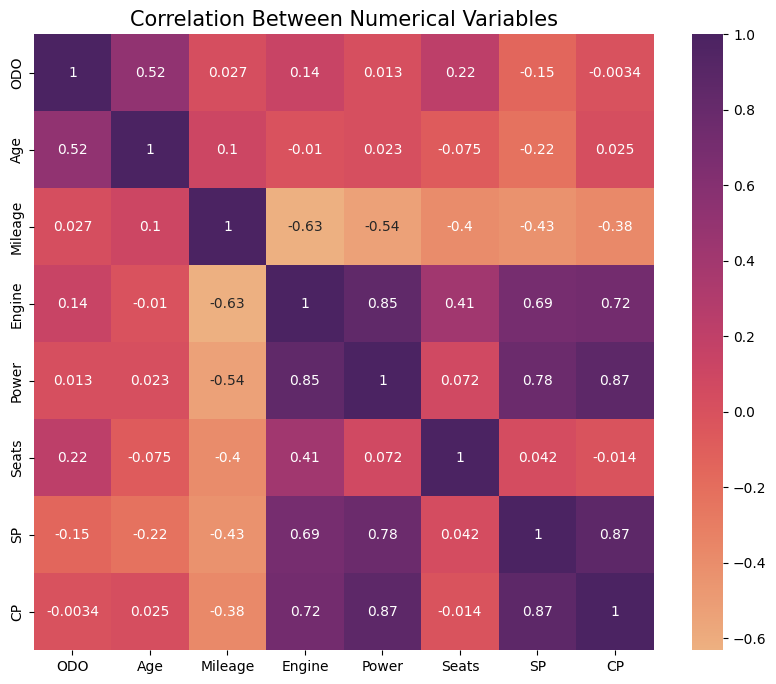

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, 5:].corr(), cmap='flare', annot=True)
plt.title("Correlation Between Numerical Variables", size=15)
plt.show()

In [21]:
# determinig relevant numerical columns
num_cols = ['ODO', 'Age', 'Mileage', 'Engine', 'Power', 'Seats', 'SP', 'CP']

# naming categorical columns
cat_cols = ["Location", "Fuel", "Transmission", 'Owner']

# saving all relevant columns
relevant_cols = cat_cols + num_cols

# reframing data
df = df[relevant_cols]

df.head()

,Location,Fuel,Transmission,Owner,ODO,Age,Mileage,Engine,Power,Seats,SP,CP
0,Chennai,Petrol,Manual,First,46000,12,15.625,1199.0,88.70,5.0,4.50,8.61
1,Mumbai,Diesel,Automatic,First,36000,7,11.360,2755.0,171.50,8.0,17.50,21.00
2,Kochi,Petrol,Manual,First,25692,5,21.560,1462.0,103.25,5.0,9.95,10.65
3,Delhi,Diesel,Manual,First,110000,9,13.500,2477.0,175.56,7.0,15.00,32.01
4,Kochi,Diesel,Automatic,First,32982,9,22.690,1995.0,190.00,5.0,18.55,47.87


## 3. **Visualizing Relevance**

***Using pairplot for an overall glance.***

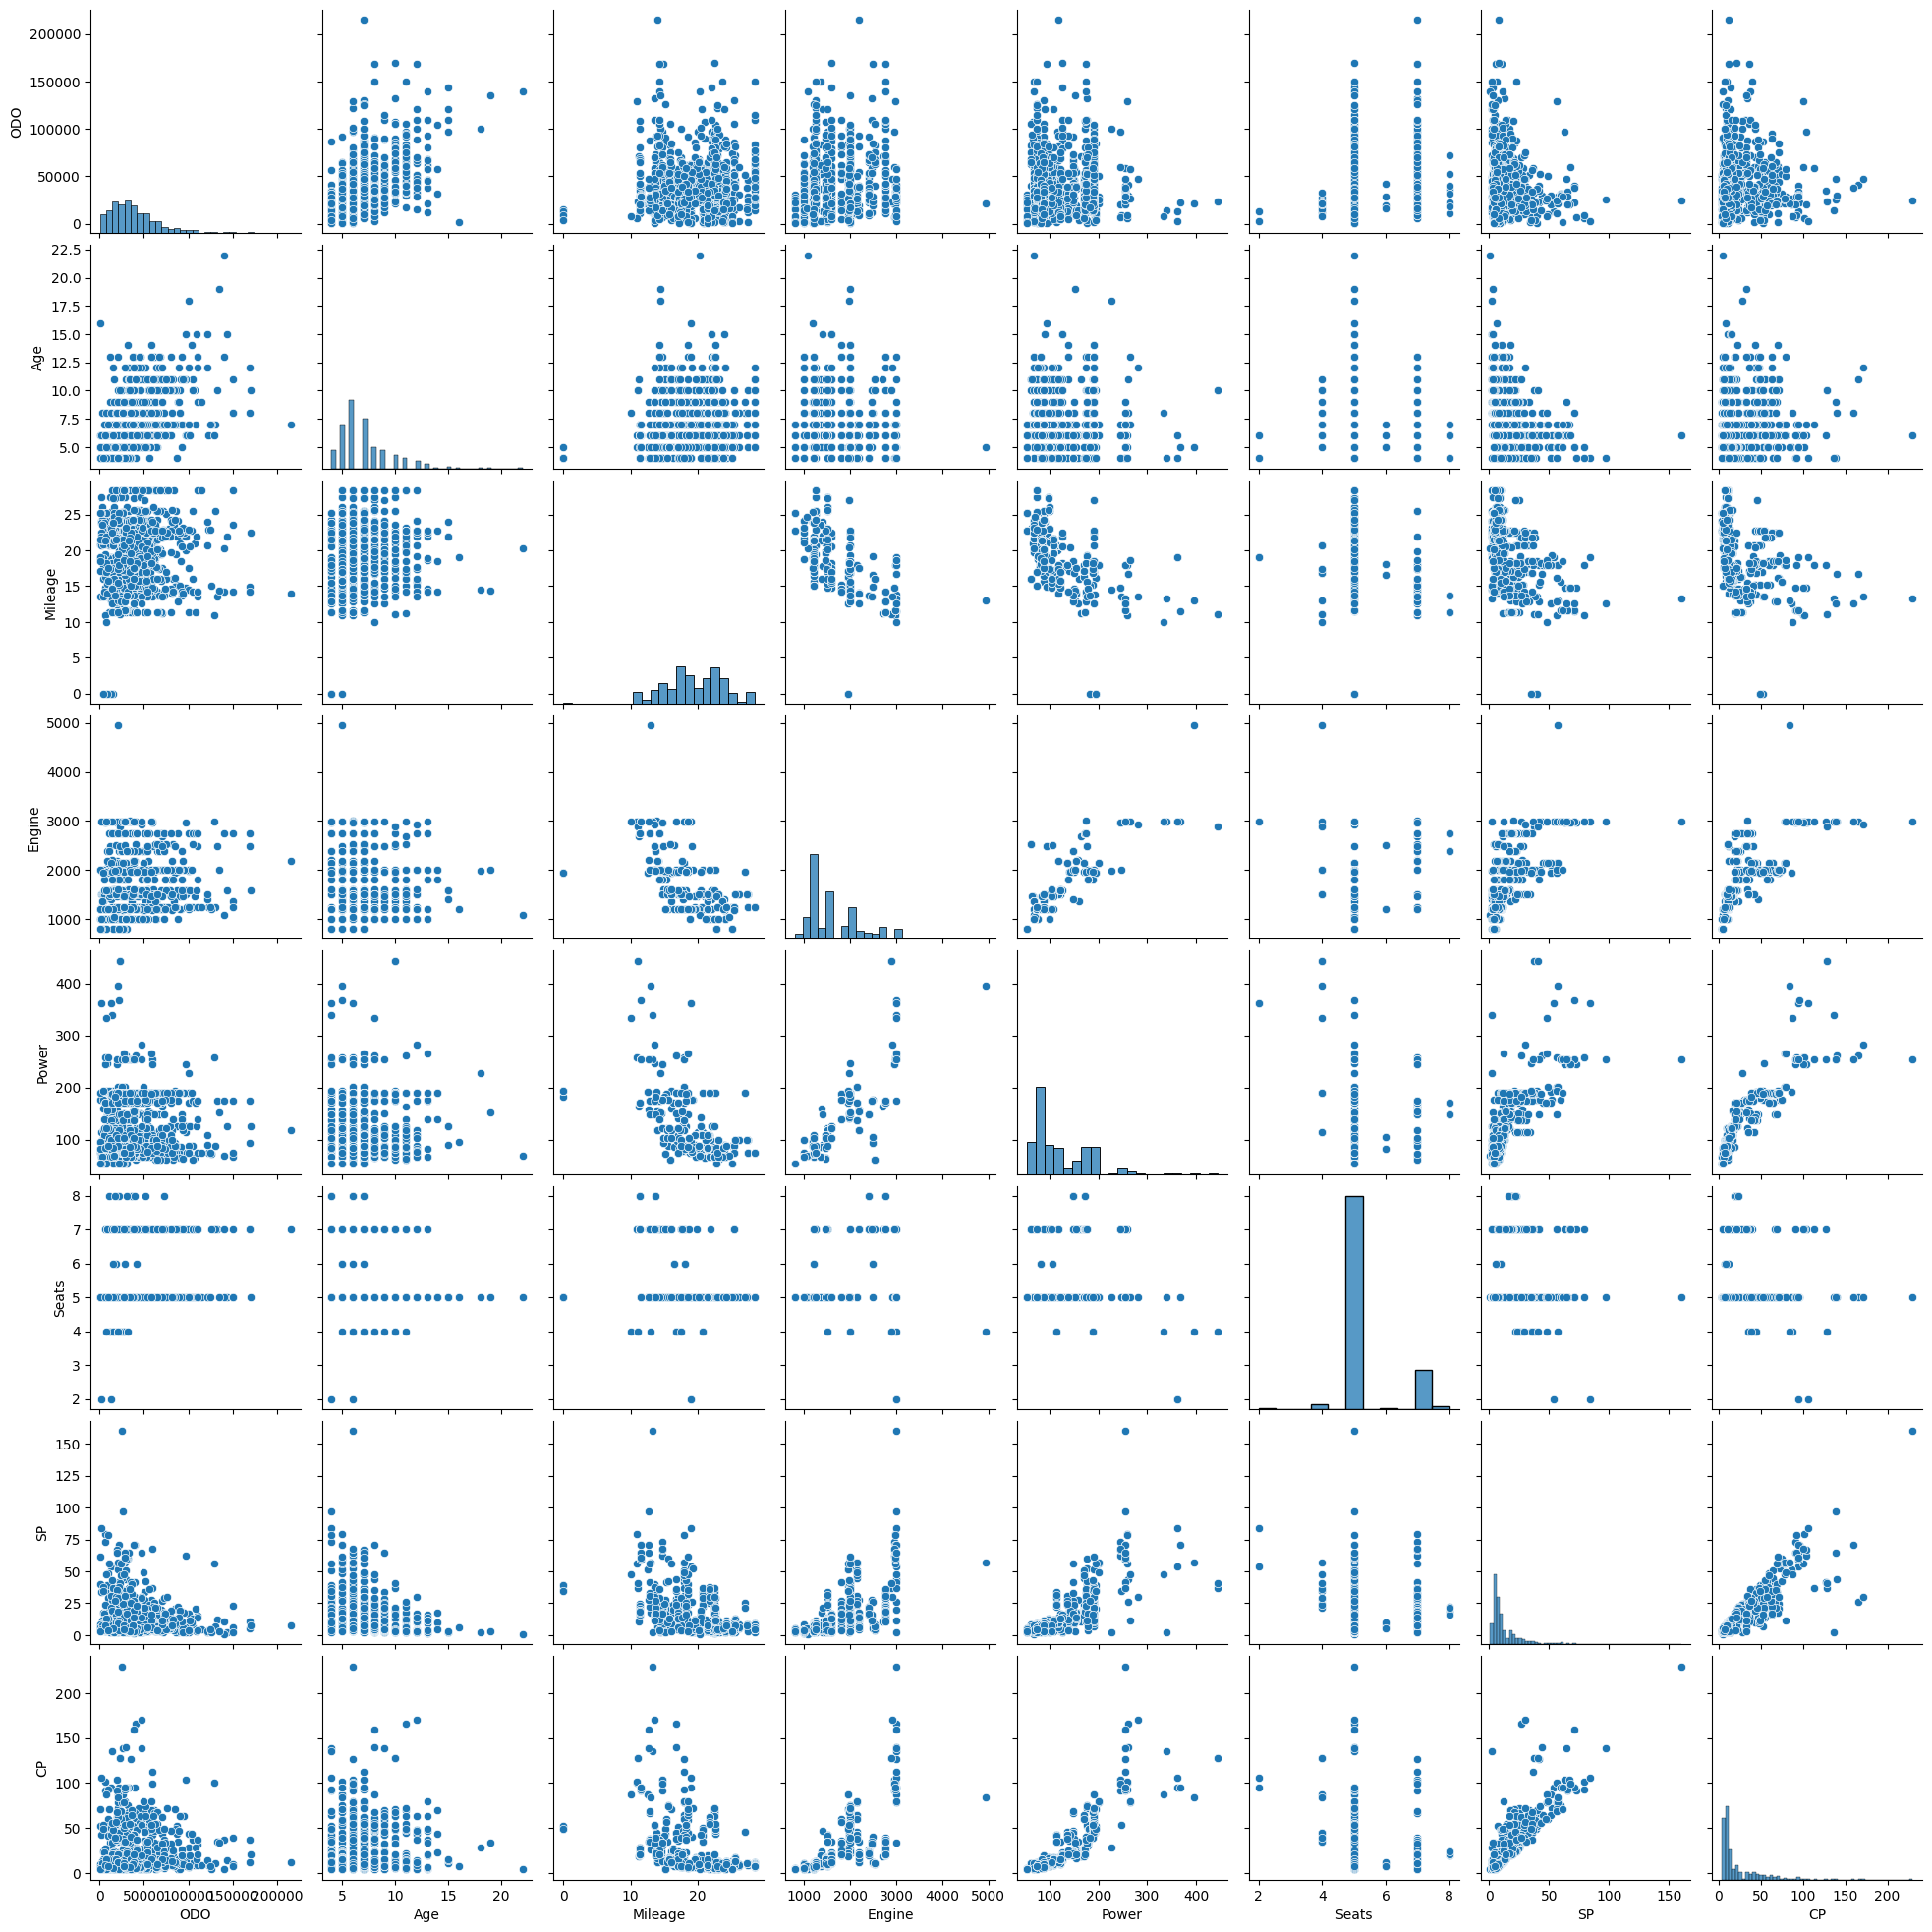

In [22]:
# glancing at data
sns.pairplot(df[relevant_cols])

## 4. **Data Splitting**

***Splitting data into X and Y chunks, input and output respectively.***

In [23]:
# feature matrix
X = df.drop('CP', axis=1)

# target variabele
y = df['CP']

In [24]:
X.head()

,Location,Fuel,Transmission,Owner,ODO,Age,Mileage,Engine,Power,Seats,SP
0,Chennai,Petrol,Manual,First,46000,12,15.625,1199.0,88.70,5.0,4.50
1,Mumbai,Diesel,Automatic,First,36000,7,11.360,2755.0,171.50,8.0,17.50
2,Kochi,Petrol,Manual,First,25692,5,21.560,1462.0,103.25,5.0,9.95
3,Delhi,Diesel,Manual,First,110000,9,13.500,2477.0,175.56,7.0,15.00
4,Kochi,Diesel,Automatic,First,32982,9,22.690,1995.0,190.00,5.0,18.55


## 5. **Label Encoder**

***Encoding categorical values in X using One-Hot Encoding Technique.***

In [25]:
from sklearn.preprocessing import LabelEncoder

# initialize the label encoder
le = LabelEncoder()

# apply label encoding to each categorical column
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

In [26]:
X.head()

,Location,Fuel,Transmission,Owner,ODO,Age,Mileage,Engine,Power,Seats,SP
0,2,1,1,0,46000,12,15.625,1199.0,88.70,5.0,4.50
1,9,0,0,0,36000,7,11.360,2755.0,171.50,8.0,17.50
2,7,1,1,0,25692,5,21.560,1462.0,103.25,5.0,9.95
3,4,0,1,0,110000,9,13.500,2477.0,175.56,7.0,15.00
4,7,0,0,0,32982,9,22.690,1995.0,190.00,5.0,18.55


## 6. **Standardizing Data**

***Standardizing numerical columns in X. StandardScaler() adjusts the mean of the features as 0 and standard deviation of featurees as 1.***

In [27]:
num_cols = ['ODO', 'Age', 'Mileage', 'Engine', 'Power', 'Seats', 'SP']

In [28]:
# standardizing
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X[cat_cols] = X[cat_cols].astype(int)

X.head()

,Location,Fuel,Transmission,Owner,ODO,Age,Mileage,Engine,Power,Seats,SP
0,2,1,1,0,0.197043,2.050228,-0.858848,-0.752777,-0.578572,-0.388087,-0.621613
1,9,0,0,0,-0.149767,-0.048999,-1.818868,2.015822,0.911345,3.372665,0.251151
2,7,1,1,0,-0.507259,-0.888690,0.477076,-0.284820,-0.316756,-0.388087,-0.255724
3,4,0,1,0,2.416628,0.790692,-1.337170,1.521175,0.984401,2.119081,0.083312
4,7,0,0,0,-0.254435,0.790692,0.731430,0.663550,1.244237,-0.388087,0.321644


## 7. **Train-Test Split**

***Splitting the data into Train and Test for better evaluation***

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

***Defining multiple error function at once for convenience***

In [30]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

## 8. **Machine Learning Models**

In [31]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])

# data processing function for models
def process(model, y_test, predictions):
    # determining error values
    mae, mse, rmse, r_squared = evaluation(y_test, predictions)
    print("Model:", model)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r_squared)

    # Create a new DataFrame for the Linear model
    new_row = pd.DataFrame({
        "Model": model,
        "MAE": [mae],
        "MSE": [mse],
        "RMSE": [rmse],
        "R2 Score": [r_squared],
    })

    return new_row;

### ***Linear Regression***

In [32]:
# performing linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

# process data for Elastic Net
new_row = process("Linear", y_test, predictions)

# Concatenate the new DataFrame to the existing 'models' DataFrame
models = pd.concat([models, new_row], ignore_index=True)


Model: Linear
MAE: 4.4920160799509325
MSE: 44.54276453456047
RMSE: 6.674036599731864
R2 Score: 0.8847636022587441


### ***Ridge Regression***

In [33]:
# performing ridge regression
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

# process data for Ridge Regressor
new_row = process("Ridge", y_test, predictions)

# Concatenate the new DataFrame to the existing 'models' DataFrame
models = pd.concat([models, new_row], ignore_index=True)


Model: Ridge
MAE: 4.485159257742799
MSE: 44.50551984050763
RMSE: 6.671245748771936
R2 Score: 0.884859957849208


### ***Lasso Regressor***

In [34]:
# performing ridge regression
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

# process data for Lasso Regressor
new_row = process("Lasso", y_test, predictions)

# Concatenate the new DataFrame to the existing 'models' DataFrame
models = pd.concat([models, new_row], ignore_index=True)

Model: Lasso
MAE: 4.478614589599855
MSE: 48.36436565248324
RMSE: 6.954449342146597
R2 Score: 0.8748767541693832


### ***Elastic Net***

In [35]:
# performing ridge regression
ridge = ElasticNet()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

# process data for Elastic Net
new_row = process("Elastic Net", y_test, predictions)

# Concatenate the new DataFrame to the existing 'models' DataFrame
models = pd.concat([models, new_row], ignore_index=True)

Model: Elastic Net
MAE: 4.892291397517428
MSE: 59.73578421858362
RMSE: 7.728892819711218
R2 Score: 0.8454578052905206


### ***Support Vector Machines***

In [36]:
# Define the hyperparameter grid for SVM
parameters_svm = {
    'C': np.logspace(-3, 3, 7),  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'degree': [2, 3, 4, 5],  # Degree of the polynomial kernel (only for poly kernel)
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),  # Kernel coefficient (only for rbf, poly, and sigmoid kernels)
    'epsilon': np.linspace(0.1, 1.0, 10)  # Epsilon in the epsilon-SVR model
}

# initializing regressor
svm_regressor = SVR()

# Create a RandomizedSearchCV object
random_cv_svm = RandomizedSearchCV(
    estimator=svm_regressor,
    param_distributions=parameters_svm,
    n_iter=10,
    scoring='neg_mean_absolute_error',  # Use an appropriate scoring metric
    random_state=42,
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit the RandomizedSearchCV object to the data
random_cv_svm.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'degree': [2, 3, 4, 5],
                                        'epsilon': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'gamma': ['scale', 'auto', 0.001, 0.01,
                                                  0.1, 1.0, 10.0, 100.0,
                                                  1000.0],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [37]:
# checking best parameters
random_cv_svm.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.2, 'degree': 5, 'C': 100.0}

In [38]:
# performing ridge regression
svr = SVR(kernel='rbf', gamma='auto', epsilon=0.2, degree=5, C=100.0)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

# process data for SVR
new_row = process("SVR", y_test, predictions)

# Concatenate the new DataFrame to the existing 'models' DataFrame
models = pd.concat([models, new_row], ignore_index=True)

Model: SVR
MAE: 2.5422710304427656
MSE: 28.63201962035397
RMSE: 5.350889610182027
R2 Score: 0.9259262231344773


### ***Random Forest Regressor***

In [39]:
# defining hyper parameter grid for Random Forest Regression
parameters = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],  # Use valid criterion values
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 6, 7, 8, 9, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_forest = RandomForestRegressor()

random_cv = RandomizedSearchCV(
    estimator=random_forest, 
    param_distributions=parameters, 
    n_iter=10, scoring ='neg_mean_absolute_error',
    random_state=42, 
    cv=5, 
    verbose=2, 
    n_jobs=-1)

random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson',
                                                      'friedman_mse'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 6, 7, 8,
                                                             9, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [40]:
# looking at best
random_cv.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 50,
 'criterion': 'friedman_mse'}

In [41]:
random_forest = RandomForestRegressor(n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features='log2', max_depth=50, criterion='friedman_mse')
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

# process data for Random Forest Regressor
new_row = process("Random Forest", y_test, predictions)

# Concatenate the new DataFrame to the existing 'models' DataFrame
models = pd.concat([models, new_row], ignore_index=True)

Model: Random Forest
MAE: 2.0068910279731087
MSE: 22.328279008978214
RMSE: 4.725280839164823
R2 Score: 0.9422346038095604


### ***XGBoost Regressor***

In [42]:
# Define the hyperparameter grid for XGBoost
parameters_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}

# Create an XGBoost regressor
xgb = XGBRegressor()

# Create a RandomizedSearchCV object
random_cv_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=parameters_xgb,
    n_iter=10,
    scoring='neg_mean_absolute_error',  # Use an appropriate scoring metric
    random_state=42,
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit the RandomizedSearchCV object to the data
random_cv_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.1, 0.5, 1.0],
                                        'reg_lambda': [0, 0.1, 0.5, 1.0],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [43]:
random_cv_xgb.best_params_

{'subsample': 0.9,
 'reg_lambda': 0.1,
 'reg_alpha': 0,
 'n_estimators': 100,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 5,
 'colsample_bytree': 0.8}

In [44]:
# Define the hyperparameters
xgb_params = {
    'subsample': 1.0,
    'reg_lambda': 0,
    'n_estimators': 300,
    'reg_alpha': 0.5,
    'max_depth': 4,
    'learning_rate': 0.2,
    'gamma': 1,
    'colsample_bytree': 0.9
}

# Create an XGBoost regressor with specified hyperparameters
xgb = XGBRegressor(**xgb_params)

# Fit the model to the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
predictions = xgb.predict(X_test)

# Process data for XGBoost Regressor
new_row = process("XG Boost", y_test, predictions)

# Concatenate the new DataFrame to the existing 'models' DataFrame
models = pd.concat([models, new_row], ignore_index=True)

Model: XG Boost
MAE: 1.7460480195400765
MSE: 13.244873314059067
RMSE: 3.639350672037399
R2 Score: 0.9657342442661543


### ***Polynomial Regressor (Deg=2)***

In [45]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

# process data for Random Forest Regressor
new_row = process("Polynomial", y_test, predictions)

# Concatenate the new DataFrame to the existing 'models' DataFrame
models = pd.concat([models, new_row], ignore_index=True)

Model: Polynomial
MAE: 4.4665724571078425
MSE: 48.33699658161239
RMSE: 6.9524813255133875
R2 Score: 0.8749475605768802


### ***Decision Tree Regressor***

In [46]:
from sklearn.tree import DecisionTreeRegressor

# Transform data using PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

# Train the Decision Tree Regressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_2d, y_train)
predictions = tree_reg.predict(X_test_2d)

# Process data for Decision Tree Regressor
new_row = process("Decision Tree", y_test, predictions)

# Concatenate the new DataFrame to the existing 'models' DataFrame
models = pd.concat([models, new_row], ignore_index=True)

Model: Decision Tree
MAE: 2.0621078431372553
MSE: 22.477987745098048
RMSE: 4.741095627077991
R2 Score: 0.9418472929715126


In [47]:
# comparing model performance
models

,Model,MAE,MSE,RMSE,R2 Score
0,Linear,4.492016,44.542765,6.674037,0.884764
1,Ridge,4.485159,44.505520,6.671246,0.884860
2,Lasso,4.478615,48.364366,6.954449,0.874877
3,Elastic Net,4.892291,59.735784,7.728893,0.845458
4,SVR,2.542271,28.632020,5.350890,0.925926
5,Random Forest,2.006891,22.328279,4.725281,0.942235
6,XG Boost,1.746048,13.244873,3.639351,0.965734
7,Polynomial,4.466572,48.336997,6.952481,0.874948
8,Decision Tree,2.062108,22.477988,4.741096,0.941847


In [48]:
mae_score = models["MAE"]
models[models["MAE"] == min(mae_score)]

,Model,MAE,MSE,RMSE,R2 Score
6,XG Boost,1.746048,13.244873,3.639351,0.965734


***XG Boost Regression has been the most accurate model for this dataset as per the MAE Scores and so we make final predictions using this model.***

In [60]:
# Predicting initial cost price
y_pred = xgb.predict(X_test)

# Calculating CP (↓) and CP (↑)
cp_min = y_pred - (0.1 * y_pred)
cp_max = y_pred + (0.1 * y_pred)

# Creating a dataframe with Actual CP, CP (↓), and CP (↑)
df_combined = pd.DataFrame({
    'Actual CP': y_test,
    'CP (↓)': cp_min,
    'CP (↑)': cp_max
})

# Rounding CP (↓) and CP (↑) to 2 decimal places
df_combined['CP (↓)'] = ((100 * df_combined['CP (↓)'].round(2)).astype(int)) / 100
df_combined['CP (↑)'] = ((100 * df_combined['CP (↑)'].round(2)).astype(int)) / 100

# Displaying the first 10 rows
df_combined.head(10)

,Actual CP,CP (↓),CP (↑)
247,6.32,6.82,8.33
589,36.94,31.52,38.53
227,48.64,43.72,53.43
291,7.36,6.89,8.42
539,17.00,16.16,19.75
800,20.46,19.61,23.97
198,21.77,19.69,24.07
294,8.44,8.33,10.18
445,15.29,13.66,16.69
423,8.84,5.90,7.21


In [50]:
# checking correlation between two columns
correlation = np.corrcoef(y_test, y_pred)[0, 1]
correlation

0.9852158475280329

---
---
# **Final Prediction**
---
---

In [62]:
# importing final test data
df = pd.read_csv("test_data.csv")
df.head()

,Car,Location,Fuel,Transmission,Owner,ODO,Age,Mileage,Engine,Power,Seats,SP
0,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,41000,8,19.67,1582.0,126.20,5.0,12.50
1,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,87000,11,20.77,1248.0,88.76,7.0,6.00
2,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,40670,10,15.20,1968.0,140.80,5.0,17.74
3,Nissan Micra Diesel XV,Jaipur,Diesel,Manual,First,86999,10,23.08,1461.0,63.10,5.0,3.50
4,Volkswagen Vento Diesel Comfortline,Pune,Diesel,Manual,First,64430,10,20.54,1598.0,103.60,5.0,5.20


***Refining test data for processing***

In [63]:
# save current df for final presentation
final_df = df

# change current df for prediction
df = df.drop('Car', axis=1)

We will now have to convert the new test data in the same format as we did for the testing data. Only then we will be run throught the model to make final predictions.

In [64]:
# encoding
num_cols = ['ODO', 'Age', 'Mileage', 'Engine', 'Power', 'Seats', 'SP']
cat_cols = ["Location", "Fuel", "Transmission", 'Owner']

# apply label encoding to each categorical column
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Location,Fuel,Transmission,Owner,ODO,Age,Mileage,Engine,Power,Seats,SP
0,10,0,1,0,41000,8,19.67,1582.0,126.20,5.0,12.50
1,2,0,1,0,87000,11,20.77,1248.0,88.76,7.0,6.00
2,3,0,0,2,40670,10,15.20,1968.0,140.80,5.0,17.74
3,6,0,1,0,86999,10,23.08,1461.0,63.10,5.0,3.50
4,10,0,1,0,64430,10,20.54,1598.0,103.60,5.0,5.20


In [65]:
# normalizing data
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[cat_cols] = df[cat_cols].astype(int)

df.head()

,Location,Fuel,Transmission,Owner,ODO,Age,Mileage,Engine,Power,Seats,SP
0,10,0,1,0,-0.205094,-0.616472,0.393735,-0.084592,0.252510,-0.349944,0.334633
1,2,0,1,0,0.259914,0.348432,0.653853,-0.633943,-0.446865,2.124946,-0.288137
2,3,0,0,2,-0.208430,0.026798,-0.663293,0.550286,0.525236,-0.349944,0.836681
3,6,0,1,0,0.259904,0.026798,1.200103,-0.283609,-0.926191,-0.349944,-0.527664
4,10,0,1,0,0.031757,0.026798,0.599465,-0.058276,-0.169655,-0.349944,-0.364786


In [66]:
# predict cost prices
y_pred = xgb.predict(df)

# convert them into dataframe with 10% confidence intervals
df_pred = pd.DataFrame({'CP (↓)': y_pred - (0.1*y_pred), 'CP (↑)': y_pred + (0.1*y_pred)})

In [68]:
# rounding to two decimal points
df_pred['CP (↓)'] = ((100*(df_pred['CP (↓)'].round(2))).astype(int))/100
df_pred['CP (↑)'] = ((100*(df_pred['CP (↑)'].round(2))).astype(int))/100
df_pred = pd.DataFrame({'CP (↓)': df_pred['CP (↓)'], 'CP (↑)': df_pred['CP (↑)']})

In [69]:
# horizontally stacking with main frame
result = pd.concat([final_df, df_pred], axis=1)
result.head()

,Car,Location,Fuel,Transmission,Owner,ODO,Age,Mileage,Engine,Power,Seats,SP,CP (↓),CP (↑)
0,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,41000,8,19.67,1582.0,126.20,5.0,12.50,27.91,34.12
1,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,87000,11,20.77,1248.0,88.76,7.0,6.00,10.74,13.13
2,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,40670,10,15.20,1968.0,140.80,5.0,17.74,34.49,42.16
3,Nissan Micra Diesel XV,Jaipur,Diesel,Manual,First,86999,10,23.08,1461.0,63.10,5.0,3.50,8.22,10.05
4,Volkswagen Vento Diesel Comfortline,Pune,Diesel,Manual,First,64430,10,20.54,1598.0,103.60,5.0,5.20,12.10,14.78


# **Conclusion**
---

In summary, I have successfully completed the project aimed at predicting the initial cost price of used cars from the **Cars24** dataset. The journey, initiated on **November 26, 2023**, has reached its completion on **November 28, 2023**. However, this completion does not mark the end but rather a transition into an active **monitoring phase**. Any updates could be made to this project when certain situations seem fit for. 

Throughout this project, I have delved into the intricacies of machine learning, identifying key features, testing various algorithms, and selecting a predictive model that best fit the prediction. The XG Boost model fit the best and hence our final prediction was made with that model.

As the project transitions into the monitoring phase, the focus shifts towards updating the notebook in case any new changes can be made to it. The timeline and milestones, from data preparation to model evaluation, have laid the groundwork for a comprehensive report, offering insights into the testing process, key influencing features, and recommendations for future enhancements. The completion of this project is not just a milestone but a stepping stone toward continuous improvement and refinement in the realm of predicting used car prices.